In [1]:
!pip install yfinance --quiet

     |████████████████████████████████| 6.4 MB 11.5 MB/s 
     |████████████████████████████████| 62 kB 1.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


**Getting market data from Yahoo Finance API**

In [2]:
import pandas as pd
import yfinance as yf

Information about a company:

In [3]:
# Example: TCS.NS
df = yf.Ticker('TCS.NS')

In this example, we have the company's sector, current price and the average volume traded in the last 10 days:

In [4]:
print("Sector: {}".format(df.get_info()['sector']))
print("Current Price: {}".format(df.get_info()['currentPrice']))
print("Average Volume: {}".format(df.get_info()['averageVolume10days']))

Sector: Technology
Current Price: 3171
Average Volume: 3694033


In [5]:
# List of available information
list(df.get_info().keys())[:10]

['zip',
 'sector',
 'fullTimeEmployees',
 'longBusinessSummary',
 'city',
 'phone',
 'country',
 'companyOfficers',
 'website',
 'maxAge']

From the returned object we can get the price history:

In [6]:
# Price history
df_hist = df.history(period='max')

In [7]:
df_hist.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-08-12,28.421632,29.357400,28.421632,29.137220,212976,0.0,0.0
2002-08-13,29.173921,29.641805,28.531728,28.742733,153576,0.0,0.0
2002-08-14,28.806949,28.806949,26.219827,26.761106,822776,0.0,0.0


Visualization of the evolution of the closing price of the asset since the beginning of the data:

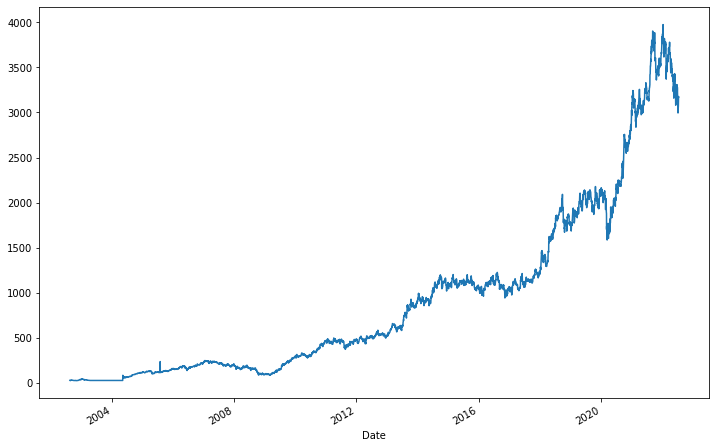

In [8]:
df_hist.Close.plot(figsize=(12,8));

If we only want the price history of one or more assets, we can call the 'download' function passing the ticker list of the assets

In [9]:
# Returning only the price history
nifty_bank = yf.download('^NSEBANK')

[*********************100%***********************]  1 of 1 completed


In [10]:
nifty_bank.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.100098,0
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.649902,0
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.850098,0


If no time period is specified, the entire history of the asset will be returned, but if you want a specific period, we can use the parameters 'start' for start date and 'end' for end date

In [11]:
# As of 2010
data = yf.download('^NSEBANK', start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [12]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,9031.900391,9129.450195,9031.900391,9112.349609,9112.349609,0
2010-01-05,9191.250000,9214.000000,9157.349609,9192.150391,9192.150391,0
2010-01-06,9243.900391,9265.549805,9183.650391,9223.000000,9223.000000,0
2010-01-07,9240.250000,9261.849609,9153.250000,9192.950195,9192.950195,0
2010-01-08,9185.049805,9214.349609,9141.450195,9160.700195,9160.700195,0


In [13]:
# History of various actions
data = yf.download('HDFCBANK.BO KOTAKBANK.BO ICICIBANK.BO AXISBANK.NS IDBI.NS', start='2010-01-01')

[*********************100%***********************]  5 of 5 completed


For each asset, the following information will be returned: 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'

Thus, our DataFrame has two levels as shown in the sample below:

In [14]:
data.head(2)

Adj Close                                                    \
           AXISBANK.NS HDFCBANK.BO ICICIBANK.BO     IDBI.NS KOTAKBANK.BO   
Date                                                                       
2010-01-04  181.106430  155.710693   135.512360  107.863136   203.234116   
2010-01-05  184.885162  155.829361   136.846024  111.487724   205.477264   

                 Close                                                    ...  \
           AXISBANK.NS HDFCBANK.BO ICICIBANK.BO     IDBI.NS KOTAKBANK.BO  ...   
Date                                                                      ...   
2010-01-04  198.419998  170.524994   159.800003  129.449997   204.987503  ...   
2010-01-05  202.559998  170.654999   161.372726  133.800003   207.250000  ...   

                  Open                                                \
           AXISBANK.NS HDFCBANK.BO ICICIBANK.BO IDBI.NS KOTAKBANK.BO   
Date                                                                   
2010-01-04  198.779999  169.024994   161.454544  127.75       203.00   
2010-01-05  199.600006  172.990005   162.000000  130.00       206.25   

                Volume                                                 
           AXISBANK.NS HDFCBANK.BO ICICIBANK.BO  IDBI.NS KOTAKBANK.BO  
Date                                                                   
2010-01-04     4371510      375410      1924433  3039409       215676  
2010-01-05     7629380      466360      2999595  6265172       283000  

[2 rows x 30 columns]

In [15]:
data.columns.levels[0]

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [16]:
data.columns.levels[1]

Index(['AXISBANK.NS', 'HDFCBANK.BO', 'ICICIBANK.BO', 'IDBI.NS',
       'KOTAKBANK.BO'],
      dtype='object')

Selecting only the closing price of each asset:

In [17]:
close = data['Close']

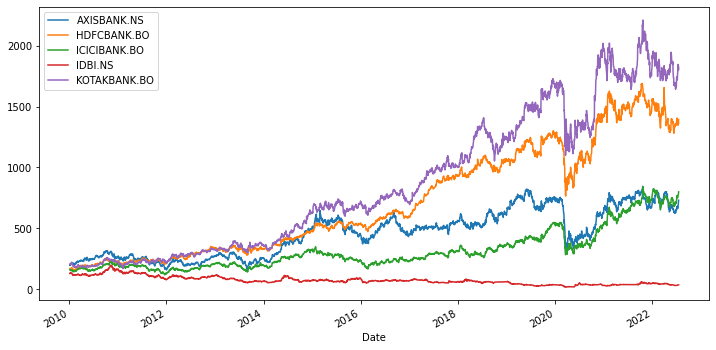

In [18]:
close.plot(figsize=(12,6))

In [19]:
# Normalization of prices (z-score)
close_norm = (close - close.mean())/close.std()

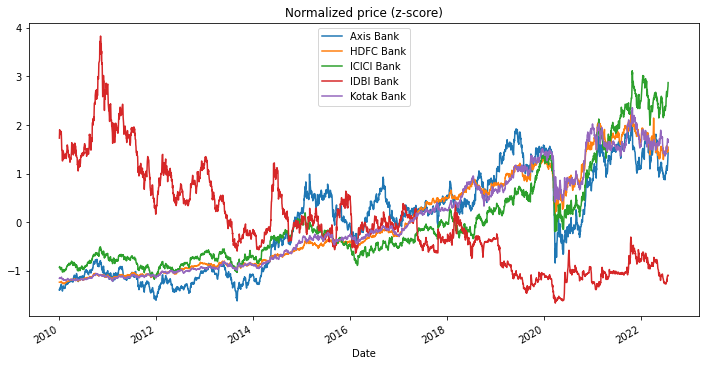

In [20]:
ax = close_norm.plot(figsize=(12, 6), title='Normalized price (z-score)')
ax.legend(['Axis Bank', 'HDFC Bank', 'ICICI Bank', 'IDBI Bank', 'Kotak Bank']);

In [21]:
# accumulated return
close_rtn = close[['AXISBANK.NS', 'HDFCBANK.BO']].pct_change()

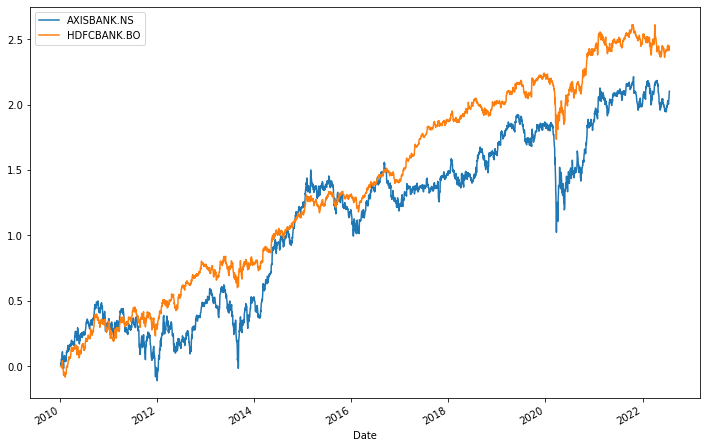

In [22]:
close_rtn.cumsum().plot(figsize=(12,8))